# Install Required Dependencies

In [1]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib tensorflowjs --user

In [2]:
pip install --upgrade mediapipe --user

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR-CONVERSION BGR-to-RGB
    image.flags.writeable = False                  # Convert image to not-writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Convert image to writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR-COVERSION RGB-to-BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

# Extracting Key points using Mediapipe

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
draw_landmarks(frame, results)

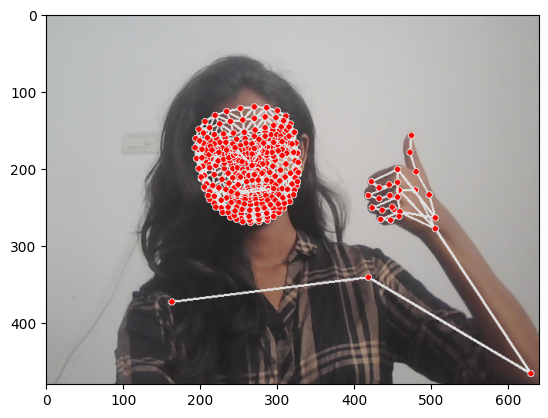

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
n = int(input("Nmuber of action you what to train: "))
new =[]
for i in range(n):
    act = input("Enter action: ")
    new.append(act)

actions = np.array(new)

# Thirty videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 60

# Folder start
start_folder = 30

signs = new


parent_folder = 'MP_Data'

if not os.path.exists(parent_folder):
    os.mkdir(parent_folder)
    for sign in signs:
        sign_folder = os.path.join(parent_folder, sign)
        os.mkdir(sign_folder)
        for i in range(30):
            subfolder = os.path.join(sign_folder, str(i))
            os.mkdir(subfolder)


Nmuber of action you what to train:  1
Enter action:  past


In [19]:
def collect_dataset(actions, no_sequences = 60, sequence_length = 60):
    cap = cv2.VideoCapture(0)
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        
        # NEW LOOP
        # Loop through actions
        for action in actions:
            # Loop through sequences aka videos
            for sequence in range(no_sequences):
                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):
    
                    # Read feed
                    ret, frame = cap.read()
    
                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)
    
                    # Draw landmarks
                    draw_styled_landmarks(image, results)
                    
                    # NEW Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                    
                    # NEW Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                    np.save(npy_path, keypoints)
    
                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                        
        cap.release()
        cv2.destroyAllWindows()

In [20]:
collect_dataset(actions)

In [21]:
cap.release()
cv2.destroyAllWindows()

# Data Preproccessing and Model Training

In [36]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

In [37]:
def extract_hand_keypoints(root_dir, hand_index_range):
    hand_keypoints = []
    for action in os.listdir(root_dir):
        action_path = os.path.join(root_dir, action)
        if not os.path.isdir(action_path):
            continue
        for video_folder in os.listdir(action_path):
            video_path = os.path.join(action_path, video_folder)
            for i in range(30):
                file_path = os.path.join(video_path, f"{i}.npy")
                if os.path.exists(file_path):
                    data = np.load(file_path)
                    hand = data[hand_index_range[0]:hand_index_range[1]]
                    if not np.all(hand == 0):
                        hand_keypoints.append(hand)
    return np.array(hand_keypoints)

left_hand_data = extract_hand_keypoints("MP_Data", (1536,1599))
right_hand_data = extract_hand_keypoints("MP_Data", (1599,1662))

In [38]:
def find_neutral_pose(hand_data, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(hand_data)
    cluster_variances = []
    for i in range(n_clusters):
        cluster_points = hand_data[kmeans.labels_ == i]
        if len(cluster_points) > 1:
            cluster_variances.append(np.mean(np.var(cluster_points, axis=0)))
        else:
            cluster_variances.append(np.inf)
    neutral_cluster = np.argmin(cluster_variances)
    return kmeans.cluster_centers_[neutral_cluster]

neutral_left = find_neutral_pose(left_hand_data)
neutral_right = find_neutral_pose(right_hand_data)

np.save("neutral_left_hand.npy", neutral_left)
np.save("neutral_right_hand.npy", neutral_right)

In [39]:
def preprocess_and_mask_hand_only(path, neutral_left, neutral_right):
    new_sequence = []
    for i in range(30):
        file = os.path.join(path, f"{i}.npy")
        if not os.path.exists(file):
            return None
        frame = np.load(file)

        # Extract left and right hand keypoints
        left_hand = frame[1536:1599]  # shape: (63,)
        right_hand = frame[1599:1662]  # shape: (63,)

        # Check presence and apply neutral pose if not present
        left_mask = 1 if not np.all(left_hand == 0) else 0
        right_mask = 1 if not np.all(right_hand == 0) else 0

        if left_mask == 0:
            left_hand = neutral_left
        if right_mask == 0:
            right_hand = neutral_right

        # Concatenate: left hand + right hand + left flag + right flag
        full_hand_input = np.concatenate([
            left_hand,          # 63
            right_hand,         # 63
            [left_mask],        # 1
            [right_mask]        # 1
        ])  # shape: (128,)

        new_sequence.append(full_hand_input)

    return np.array(new_sequence)  # shape: (30, 128)

In [40]:
DATA_DIR = "MP_Data"
sequences, labels, class_names = [], [], []
label_map = {}

for idx, action in enumerate(sorted(os.listdir(DATA_DIR))):
    action_path = os.path.join(DATA_DIR, action)
    if os.path.isdir(action_path):
        label_map[action] = idx
        class_names.append(action)

for action in class_names:
    action_path = os.path.join(DATA_DIR, action)
    for video in os.listdir(action_path):
        video_path = os.path.join(action_path, video)
        sequence = preprocess_and_mask_hand_only(video_path, neutral_left, neutral_right)
        if sequence is not None:
            sequences.append(sequence)
            labels.append(label_map[action])

X = np.array(sequences)  # shape: (num_samples, 30, 128)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [41]:
def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Dropout(0.2),
        LSTM(64, return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

input_shape = (30, 128)  # changed from (30, 1664)
num_classes = len(class_names)
model = build_lstm_model(input_shape, num_classes)

In [42]:
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint("best_lstm_model1.h5", save_best_only=True, monitor='val_accuracy', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5),
    tensorboard_callback
]

In [43]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks)

Epoch 1/100
23/23 [==============================] - ETA: 0s - loss: 2.8805 - accuracy: 0.0770
Epoch 1: val_accuracy improved from -inf to 0.16340, saving model to best_lstm_model1.h5
23/23 [==============================] - 7s 93ms/step - loss: 2.8805 - accuracy: 0.0770 - val_loss: 2.8290 - val_accuracy: 0.1634 - lr: 5.0000e-04
Epoch 2/100
 5/23 [=====>........................] - ETA: 0s - loss: 2.8408 - accuracy: 0.0812

C:\Users\Madesh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - ETA: 0s - loss: 2.8053 - accuracy: 0.1190
Epoch 2: val_accuracy improved from 0.16340 to 0.23529, saving model to best_lstm_model1.h5
23/23 [==============================] - 1s 40ms/step - loss: 2.8053 - accuracy: 0.1190 - val_loss: 2.6924 - val_accuracy: 0.2353 - lr: 5.0000e-04
Epoch 3/100
23/23 [==============================] - ETA: 0s - loss: 2.6565 - accuracy: 0.1807
Epoch 3: val_accuracy did not improve from 0.23529
23/23 [==============================] - 1s 38ms/step - loss: 2.6565 - accuracy: 0.1807 - val_loss: 2.5975 - val_accuracy: 0.1405 - lr: 5.0000e-04
Epoch 4/100
23/23 [==============================] - ETA: 0s - loss: 2.5067 - accuracy: 0.2059
Epoch 4: val_accuracy did not improve from 0.23529
23/23 [==============================] - 1s 38ms/step - loss: 2.5067 - accuracy: 0.2059 - val_loss: 2.4238 - val_accuracy: 0.1830 - lr: 5.0000e-04
Epoch 5/100
23/23 [==============================] - ETA: 0s - loss: 2.3883 - accuracy: 0.22

In [44]:
model.save("sign_lstm_model.h5")
np.save("class_names.npy", class_names)

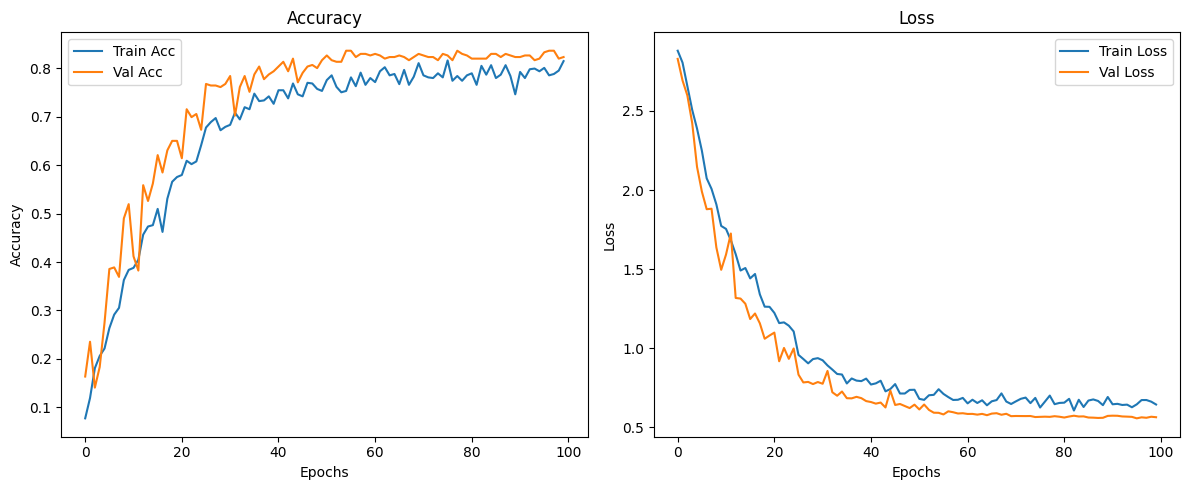

In [45]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("training_plot.png")
plt.show()

# Real-time Prediction for a word

In [76]:
import numpy as np
import cv2
import mediapipe as mp
from tensorflow.keras.models import load_model

# Load the model and neutral hand values
model = load_model("best_lstm_model1.h5")
neutral_left = np.load("neutral_left_hand.npy")   # shape (63,)
neutral_right = np.load("neutral_right_hand.npy") # shape (63,)
class_names = np.load("class_names.npy")          # shape (num_classes,)

# MediaPipe setup
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] 
                     for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    
    face = np.array([[res.x, res.y, res.z] 
                     for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    
    lh = np.array([[res.x, res.y, res.z] 
                   for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    
    rh = np.array([[res.x, res.y, res.z] 
                   for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    
    return np.concatenate([pose, face, lh, rh])  # shape: (1662,)

def slice_hand_data(keypoints):
    left_hand = keypoints[1536:1599]   # 21 keypoints * 3
    right_hand = keypoints[1599:1662]

    left_flag = 0 if np.all(left_hand == 0) else 1
    right_flag = 0 if np.all(right_hand == 0) else 1

    if left_flag == 0:
        left_hand = neutral_left
    if right_flag == 0:
        right_hand = neutral_right

    return np.concatenate([left_hand, right_hand, [left_flag, right_flag]])  # shape: (128,)

# Start video capture and MediaPipe
sequence = []
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while len(sequence) < 30:
        ret, frame = cap.read()
        if not ret:
            continue

        # Flip and process frame
        frame = cv2.flip(frame, 1)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)

        keypoints = extract_keypoints(results)
        processed = slice_hand_data(keypoints)
        sequence.append(processed)

        # Optional: draw landmarks
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        
        cv2.putText(image, f'Collecting frame {len(sequence)}/30', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Recording', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Predict the action
sequence = np.array(sequence)
sequence = np.expand_dims(sequence, axis=0)  # shape: (1, 30, 128)

prediction = model.predict(sequence)[0]  # shape: (num_classes,)
predicted_index = np.argmax(prediction)
confidence = prediction[predicted_index]

predicted_action = class_names[predicted_index]

print(f"Predicted Action: {predicted_action}")
print(f"Confidence Score: {confidence:.2f}")


1/1 [==============================] - 1s 1s/step
Predicted Action: future
Confidence Score: 0.75


# Real-time Prediction for a sentence

In [91]:
import numpy as np
import cv2
import mediapipe as mp
import time
from tensorflow.keras.models import load_model

# Load model and resources
model = load_model("sign_lstm_model.h5")
neutral_left = np.load("neutral_left_hand.npy")
neutral_right = np.load("neutral_right_hand.npy")
class_names = np.load("class_names.npy")

# MediaPipe setup
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] 
                     for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] 
                     for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] 
                   for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] 
                   for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

def slice_hand_data(keypoints):
    left_hand = keypoints[1536:1599]
    right_hand = keypoints[1599:1662]

    left_flag = 0 if np.all(left_hand == 0) else 1
    right_flag = 0 if np.all(right_hand == 0) else 1

    if left_flag == 0:
        left_hand = neutral_left
    if right_flag == 0:
        right_hand = neutral_right

    return np.concatenate([left_hand, right_hand, [left_flag, right_flag]])

# Start video capture
cap = cv2.VideoCapture(0)
word_index = 1
sentence = []
confidences = []

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:
        sequence = []

        # Collect 30 frames with 1s gap for the current word
        while len(sequence) < 30:
            ret, frame = cap.read()
            if not ret:
                continue

            frame = cv2.flip(frame, 1)
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
            results = holistic.process(image)

            keypoints = extract_keypoints(results)
            processed = slice_hand_data(keypoints)
            sequence.append(processed)

            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

            cv2.putText(image, f"Collecting word {word_index}: frame {len(sequence)}/30", (10, 40),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)

            cv2.imshow("Sign Language Collection", image)

            # Wait for 1 second before collecting the next frame
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

        if len(sequence) < 30:
            break  # user quit early

        # Predict the collected word
        input_data = np.expand_dims(np.array(sequence), axis=0)
        prediction = model.predict(input_data)[0]
        predicted_index = np.argmax(prediction)
        confidence = prediction[predicted_index]
        predicted_word = class_names[predicted_index]
        
        # Add to sentence only if confidence ≥ 60%
        if confidence >= 0.50:
            sentence.append(predicted_word)
            confidences.append(confidence)
            print(f"[Word {word_index}] ✅ '{predicted_word}' added (Confidence: {confidence:.2f})")
        else:
            print(f"[Word {word_index}] ❌ '{predicted_word}' skipped (Confidence: {confidence:.2f})")


        word_index += 1

        # Display result so far
        print(f"[Word {word_index - 1}] {predicted_word} (Confidence: {confidence:.2f})")

        # Check if user wants to quit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Cleanup
cap.release()
cv2.destroyAllWindows()

# Final sentence
final_sentence = " ".join(sentence)
print("\n🔤 Final Sentence:", final_sentence)
print("📊 Confidence Scores:", ["{:.2f}".format(c) for c in confidences])


1/1 [==============================] - 1s 1s/step
[Word 1] ✅ 'future' added (Confidence: 0.93)
[Word 1] future (Confidence: 0.93)
1/1 [==============================] - 0s 38ms/step
[Word 2] ✅ 'friend' added (Confidence: 0.80)
[Word 2] friend (Confidence: 0.80)
1/1 [==============================] - 0s 39ms/step
[Word 3] ✅ 'come' added (Confidence: 0.95)
[Word 3] come (Confidence: 0.95)

🔤 Final Sentence: future friend come
📊 Confidence Scores: ['0.93', '0.80', '0.95']


In [86]:
!pip install spacy
!pip install textblob
!python -m spacy download en_core_web_sm

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.7 MB/s eta 0:00:00
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [92]:
import spacy
from textblob import TextBlob

nlp = spacy.load("en_core_web_sm")

def process_sentence(input_sentence):
    words = input_sentence.strip().split()
    if not words:
        return ""

    tense = None
    if words[0].lower() == "past":
        tense = "past"
        content = " ".join(words[1:])
    elif words[0].lower() == "future":
        tense = "future"
        content = " ".join(words[1:])
    else:
        content = input_sentence

    blob = TextBlob(content)
    # Get corrected grammar
    corrected = str(blob.correct())

    if tense == "past":
        corrected = " ".join([word if not word.isalpha() else TextBlob(word).words[0].lemmatize("v") for word in corrected.split()])
        blob = TextBlob(corrected)
        past = blob.translate(to="en").correct().sentences[0].string
        return f"{blob.sentences[0].words[0].past_tense()} {corrected[len(blob.sentences[0].words[0]):]}"
    elif tense == "future":
        return "will " + corrected
    else:
        return corrected

# Examples
print(process_sentence(final_sentence))



will friend come


In [99]:
# Save the model
model.save('model/sign_language_model.h5')

C:\Users\Madesh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
